# Import Necessary Libraries

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# Loading the Dataset

In [37]:
data = pd.read_csv('heart.csv')

# Splitting the data into features and target

In [38]:
X = data.drop('target', axis=1)
y = data['target']

# Splitting the data into test and train split

In [39]:
X_train,X_test,y_train,y_test= train_test_split(X, y, test_size=0.2, random_state=42)

# Function to train model and evaluate it

In [40]:
def evaluate_model(model, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred)

    #Plot the Confusion Matrix
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu", cbar=False)
    plt.title(f"Confusion Matrix - {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    print(f"\n {model_name} Performance:")
    print(f"Accuracy: {acc:.4f}")
    print("Classification Report:\n", report)

# Plot the Confusion Matrix

##Decision Tree Classifier

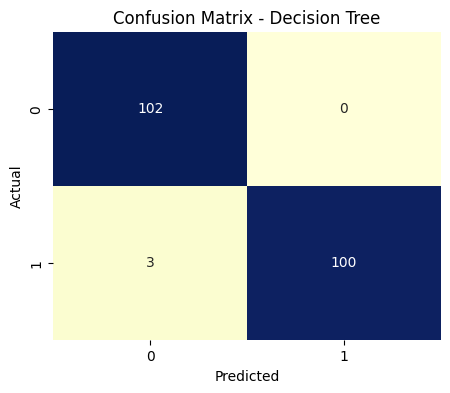


 Decision Tree Performance:
Accuracy: 0.9854
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



In [41]:
dt_model = DecisionTreeClassifier(random_state=42)
evaluate_model(dt_model, "Decision Tree")

## Naive Bayes Classifier

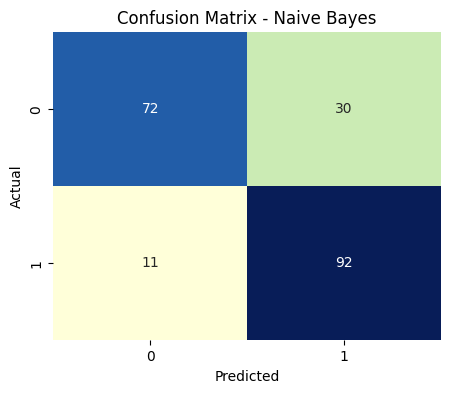


 Naive Bayes Performance:
Accuracy: 0.8000
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.71      0.78       102
           1       0.75      0.89      0.82       103

    accuracy                           0.80       205
   macro avg       0.81      0.80      0.80       205
weighted avg       0.81      0.80      0.80       205



In [42]:
nb_model = GaussianNB()
evaluate_model(nb_model, "Naive Bayes")


## Support Vector Machine

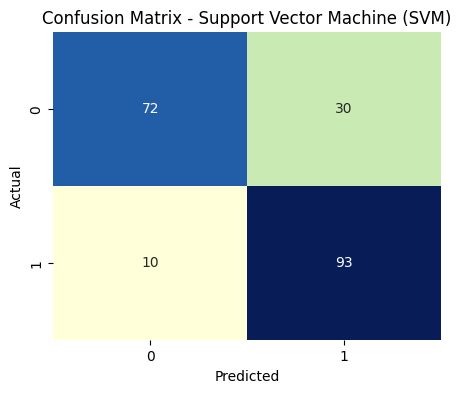


 Support Vector Machine (SVM) Performance:
Accuracy: 0.8049
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.71      0.78       102
           1       0.76      0.90      0.82       103

    accuracy                           0.80       205
   macro avg       0.82      0.80      0.80       205
weighted avg       0.82      0.80      0.80       205



In [43]:
svm_model = SVC(kernel='linear')  # Try 'rbf' if needed
evaluate_model(svm_model, "Support Vector Machine (SVM)")


# Store accuracy scores

In [44]:
accuracy_scores = {
    "Decision Tree": accuracy_score(y_test, dt_model.predict(X_test)),
    "Naive Bayes": accuracy_score(y_test, nb_model.predict(X_test)),
    "SVM": accuracy_score(y_test, svm_model.predict(X_test))
}


# Plot bar chart

<ipython-input-45-d49c608a999a>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(accuracy_scores.keys()), y=list(accuracy_scores.values()), palette="Set2")


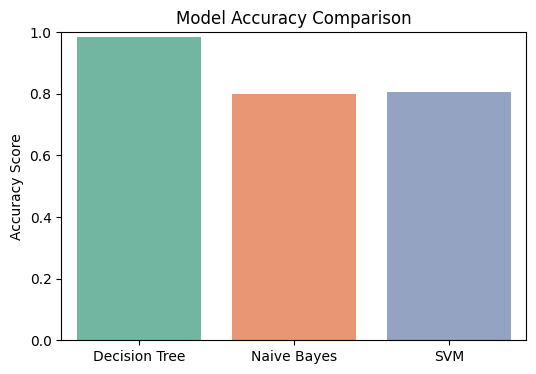

In [45]:
plt.figure(figsize=(6,4))
sns.barplot(x=list(accuracy_scores.keys()), y=list(accuracy_scores.values()), palette="Set2")
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy Score")
plt.ylim(0, 1)
plt.show()